<a href="https://colab.research.google.com/github/kabeer09/oasis_infobyte/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spam.csv' , encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
755,ham,So why didnt you holla?,NaN,NaN,NaN
4567,ham,hiya hows it going in sunny africa? hope u r a...,NaN,NaN,NaN
3342,ham,"I haven't forgotten you, i might have a couple...",NaN,NaN,NaN
233,ham,Yes:)here tv is always available in work place..,NaN,NaN,NaN
1203,ham,Thanks for understanding. I've been trying to ...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])


In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

In [15]:
5572-5169

403

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt


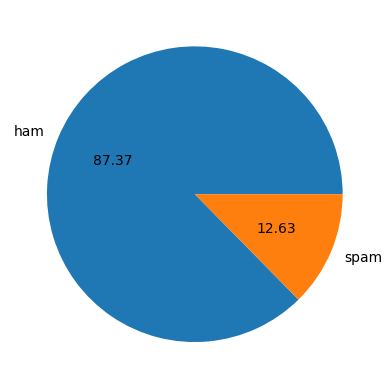

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct= "%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['no_of_char'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
df['no_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['no_of_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,no_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**for ham**


In [27]:
df[df['target']==0][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


for spam

In [28]:
df[df['target']==1][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='no_of_char', ylabel='Count'>

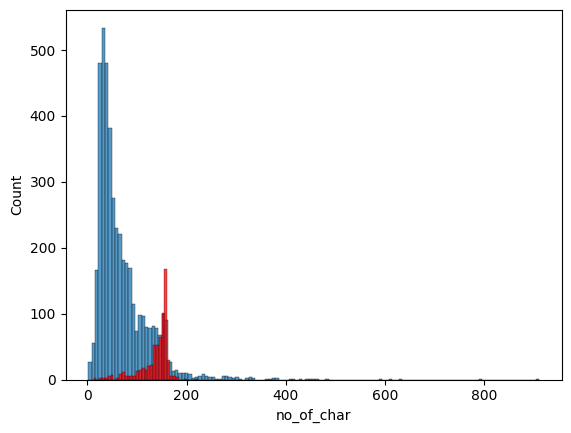

In [30]:
sns.histplot(df[df['target']==0]['no_of_char'])
sns.histplot(df[df['target']==1]['no_of_char'],color='red')

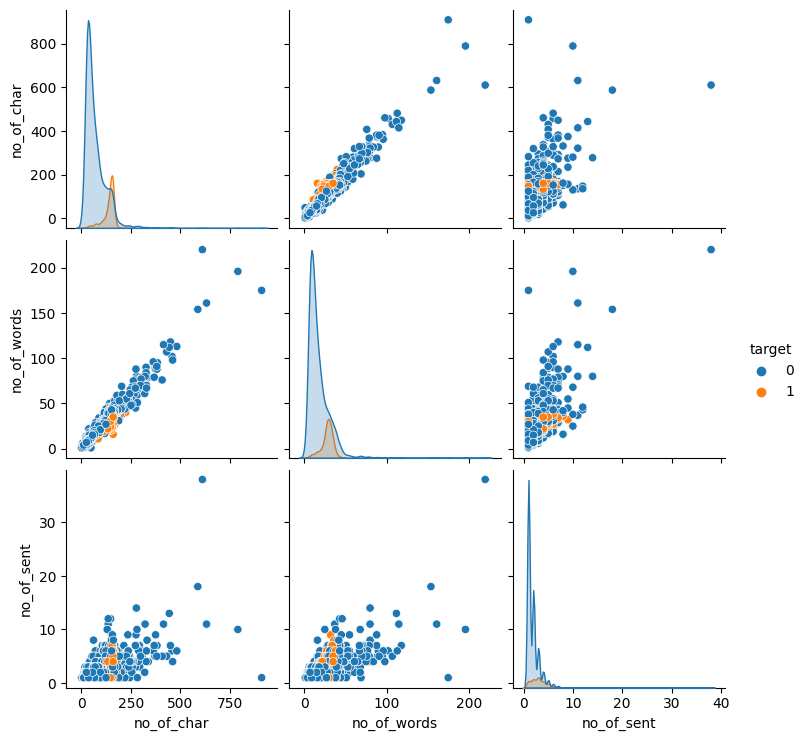

In [31]:
sns.pairplot(df,hue='target')

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'no_of_char'}>],
       [<Axes: title={'center': 'no_of_words'}>,
        <Axes: title={'center': 'no_of_sent'}>]], dtype=object)

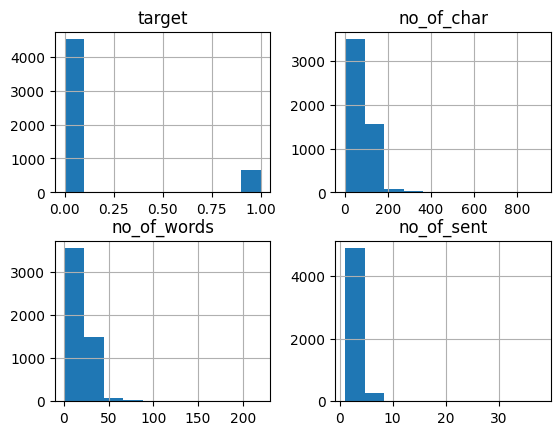

In [32]:
df.hist()

In [33]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,no_of_char,no_of_words,no_of_sent
target,1.000000,0.384717,0.262912,0.263939
no_of_char,0.384717,1.000000,0.965760,0.624139
no_of_words,0.262912,0.965760,1.000000,0.679971
no_of_sent,0.263939,0.624139,0.679971,1.000000


<ipython-input-34-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

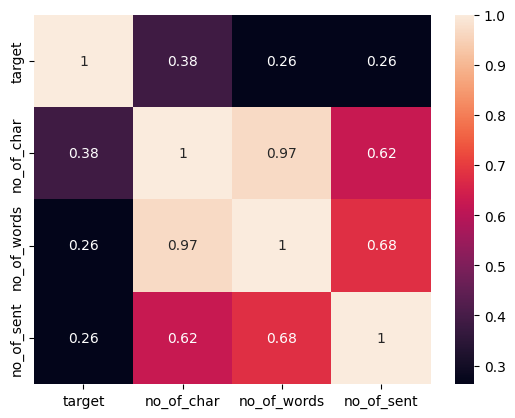

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
def transform_text(text):
    text = text.lower()
    return text

In [36]:
transform_text('Hi I Am Good')

'hi i am good'

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [38]:
transform_text('Hi I Am Good')

['hi', 'i', 'am', 'good']

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
       if i.isalnum():
          y.append(i)

    return y

In [40]:
transform_text('Hi I Am Good =')

['hi', 'i', 'am', 'good']

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
       if i.isalnum():
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)


    return y

In [44]:
transform_text('hi i am good kabeer')


['hi', 'good', 'kabeer']

In [45]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
       if i.isalnum():
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)

    text = y[:]
    y.clear()
    for i in text:
         y.append(ps.stem(i))



    return "  ".join(y)

In [48]:
transform_text('hi i am kabeer i like yt ')

'hi  kabeer  like  yt'

In [49]:
df['transform_text'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,no_of_char,no_of_words,no_of_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=""))

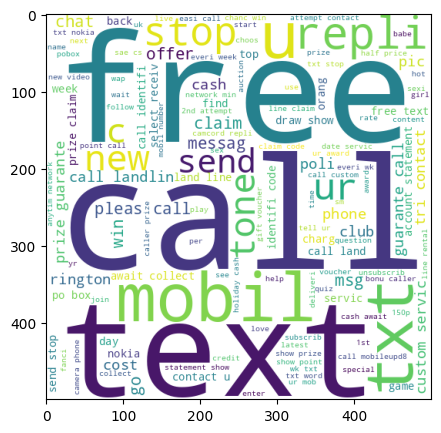

In [53]:
plt.figure(figsize=(20,5))
plt.imshow(spam_wc)


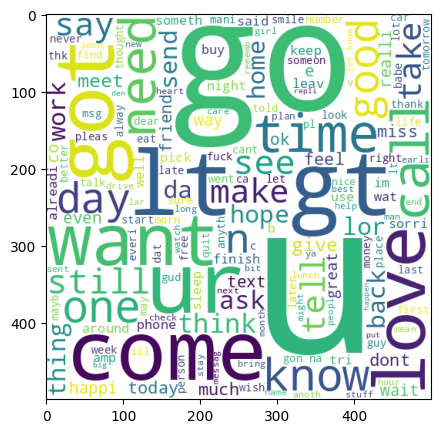

In [54]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=""))
plt.figure(figsize=(20,5))
plt.imshow(ham_wc)


In [55]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
   for word in msg.split():
    spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [89]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer
tfidf = TfidfVectorizer

In [90]:
raw_documents = df['transform_text'].tolist()

tfidf = TfidfVectorizer()

# Fit and transform the raw documents
x = tfidf.fit_transform(raw_documents).toarray()


In [91]:
x.shape

(5169, 6708)

In [92]:
y = df['target'].values

In [93]:



y.shape

(5169,)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [96]:
from sklearn.naive_bayes import GaussianNB

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [99]:
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernoulliNB

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming x_train, x_test, y_train, y_test are your training and testing data
gnb = GaussianNB()

# Assuming you have already split your data into training and testing sets
gnb.fit(x_train, y_train)

# Now you can make predictions on the test set
y_pred1 = gnb.predict(x_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Accuracy: 0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision: 0.5231481481481481


In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming x_train, x_test, y_train, y_test are your training and testing data
mnb = MultinomialNB()

# Assuming you have already split your data into training and testing sets
mnb.fit(x_train, y_train)

# Now you can make predictions on the test set
y_pred = mnb.predict(x_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision: 1.0


In [102]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming x_train, x_test, y_train, y_test are your training and testing data
bnb = BernoulliNB()

# Assuming you have already split your data into training and testing sets
bnb.fit(x_train, y_train)

# Now you can make predictions on the test set
y_pred3 = bnb.predict(x_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))


Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision: 0.9734513274336283
